# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite, Beta
import thinkplot

## Unreliable observation

Suppose that instead of observing coin tosses directly, you measure the outcome using an instrument that is not always correct. Specifically, suppose there is a probability `y` that an actual heads is reported as tails, or actual tails reported as heads.

Write a class that estimates the bias of a coin given a series of outcomes and the value of `y`.

How does the spread of the posterior distribution depend on `y`?

In [2]:
# Solution

# Here's a class that models an unreliable coin

class UnreliableCoin(Suite):
    
    def __init__(self, prior, y):
        """
        prior: seq or map
        y: probability of accurate measurement
        """
        super().__init__(prior)
        self.y = y
    
    def Likelihood(self, data, hypo):
        """
        data: outcome of unreliable measurement, either 'H' or 'T'
        hypo: probability of heads, 0-100
        """
        x = hypo / 100
        y = self.y
        if data == 'H':
            return x*y + (1-x)*(1-y)
        else:
            return x*(1-y) + (1-x)*y

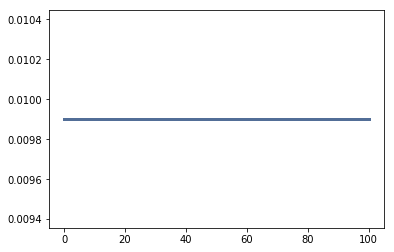

In [3]:
# Solution

# Now let's initialize an UnreliableCoin with `y=0.9`:

prior = range(0, 101)
suite = UnreliableCoin(prior, y=0.9)
thinkplot.Pdf(suite)

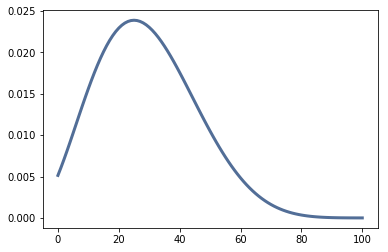

In [4]:
# Solution

# And update with 3 heads and 7 tails.

for outcome in 'HHHTTTTTTT':
    suite.Update(outcome)
    
thinkplot.Pdf(suite)

In [5]:
# Solution

# Now let's try it out with different values of `y`:

def plot_posterior(y, data):
    prior = range(0, 101)
    suite = UnreliableCoin(prior, y=y)
    for outcome in data:
        suite.Update(outcome)
    
    thinkplot.Pdf(suite, label='y=%g' % y)

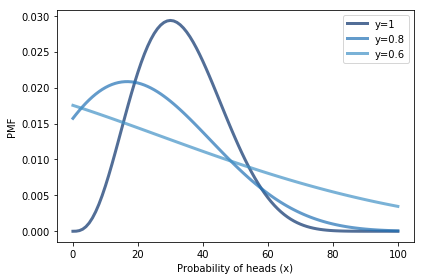

In [6]:
# Solution

# The posterior distribution gets wider as the measurement gets less reliable.

data = 'HHHTTTTTTT'
plot_posterior(1, data)
plot_posterior(0.8, data)
plot_posterior(0.6, data)
thinkplot.decorate(xlabel='Probability of heads (x)',
                   ylabel='PMF')

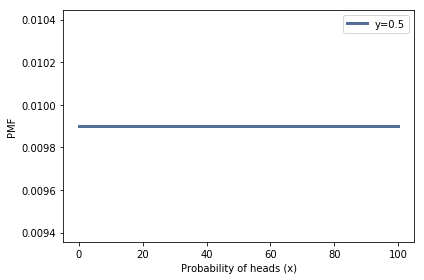

In [7]:
# Solution

# At `y=0.5`, the measurement provides no information, so the posterior equals the prior:

plot_posterior(0.5, data)
thinkplot.decorate(xlabel='Probability of heads (x)',
                   ylabel='PMF')

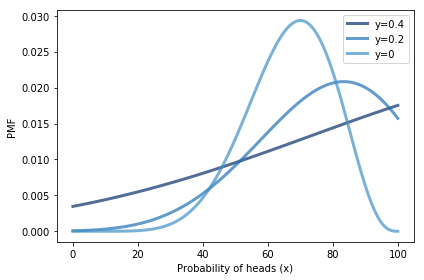

In [8]:
# Solution

# As the coin gets less reliable (below `y=0.5`) the distribution gets narrower again.  
# In fact, a measurement with `y=0` is just as good as one with `y=1`, 
# provided that we know what `y` is.

plot_posterior(0.4, data)
plot_posterior(0.2, data)
plot_posterior(0.0, data)
thinkplot.decorate(xlabel='Probability of heads (x)',
                   ylabel='PMF')